# Milestone 5

El milestone 5 consiste en integrar el problema de los N cuerpos, tomando $\mathbf{U} = (\mathbf{x}_{0}, \mathbf{v}_{0}, \dots, \mathbf{x}_{N_{b}-1}, \mathbf{v}_{N_{b}-1})$ y $\mathbf{F}(\mathbf{U},t)=(\mathbf{v}_{0}, \mathbf{S}_{0},\dots,\mathbf{v}_{N_{b}-1}, \mathbf{S}_{N_{b}-1})$, donde $N_{b}$ es el número de cuerpos, y $S_{i}=\sum_{i\neq j}^{N_{b}-1} \frac{\mathbf{r}_{i}-\mathbf{r}_{j}}{||\mathbf{r}_{i}-\mathbf{r}_{j}||^{3}}$.

En esta milestone, `differential_equations` ha sido renombrado como `physics` y se ha añadido un archivo `cauchy_problem.py` con las funciones del problema de Cauchy. El problema de los N cuerpos se halla en el archivo `physics` junto a los otros problemas físicos de *milestones* anteriores.

Se observa que los resultados varían notablemente en función del método numérico usado para una cantidad de pasos temporales fija. En particular, Crank Nicholson y Euler inverso, al ser métodos implícitos y requerir la evaluación del Jacobiano para obtener el siguiente paso, sufren de indeterminaciones en la Jacobiana, dado que el problema de los N cuerpos es *stiff* y se pueden dar casos de distancias infinitesimales en las masas, generando comportamientos asintóticos. Además, se observa también que el leapfrog no es capaz de manejar este sistema debido a su no-linearidad y a efectos caóticos. 

In [17]:
from physics_v3 import N_body_problem
from temporal_schemes_v3 import Euler, RK4, Crank_Nicolson, Inverse_Euler, leapfrog
from cauchy_problem import Cauchy_problem
from numpy import linspace, array
from matplotlib import pyplot as plt


In [11]:
def plot_N_body_problem_orbits(problem, U0_list, t, time_scheme, N_body=5, **kwargs):
    """
    Plots orbits with multiple initial conditions on a single plot.
    problem: The cauchy problem to solve.
    U0_list: List of initial conditions
    t: Time values for the integration (array).
    time_scheme: Time scheme for integration.
    """
    ax = plt.figure().add_subplot(projection='3d')
    dim = 3
    for U0 in U0_list:
        U = Cauchy_problem(problem, U0, t, time_scheme, **kwargs)
        for i in range(0, N_body):
            ax.plot(U[:,2*i*dim], U[:,2*i*dim+1], U[:,2*i*dim+2], label=f"body {i}")
    ax.set_title(f"Posiciones del problema de los {N_body} cuerpos con esquema {time_scheme.__name__}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()
    plt.show()
    return

def plot_N_body_problem_velocities(problem, U0_list, t, time_scheme, N_body=5, **kwargs):
    """
    Plots orbits with multiple initial conditions on a single plot.
    problem: The cauchy problem to solve.
    U0_list: List of initial conditions
    t: Time values for the integration (array).
    time_scheme: Time scheme for integration.
    """
    ax = plt.figure().add_subplot(projection='3d')
    dim = 3
    for U0 in U0_list:
        U = Cauchy_problem(problem, U0, t, time_scheme, **kwargs)
        for i in range(0, N_body):
            ax.plot(U[:,2*i*dim+dim], U[:,2*i*dim+dim+1], U[:,2*i*dim+dim+2], label=f"body {i}")
    ax.set_title(f"Velocidades del problema de los {N_body} cuerpos con esquema {time_scheme.__name__}")
    ax.set_xlabel("v_x")
    ax.set_ylabel("v_y")
    ax.set_zlabel("v_z")
    ax.legend()
    plt.show()
    return


In [12]:
T = 3
N_T = 3000
t = linspace(0, T, N_T)
U0 = array([
    # r0
    -1.0,  0.5,  0.0,
    # v0
     0.0,  0.3,  0.1,
    # r1
     1.2, -0.4,  0.3,
    # v1
    -0.2,  0.1,  0.0,
    # r2
     0.0,  1.5, -0.2,
    # v2
     0.1, -0.1,  0.2,
    # r3
    -1.3, -1.0,  0.4,
    # v3
     0.2,  0.0, -0.1,
    # r4
     0.8,  0.9, -0.5,
    # v4
    -0.1, -0.2,  0.1,
])
U0_list = [U0]
tol_jacobian = 1e-9
N_max = 10000
newton_tol = 1e-10

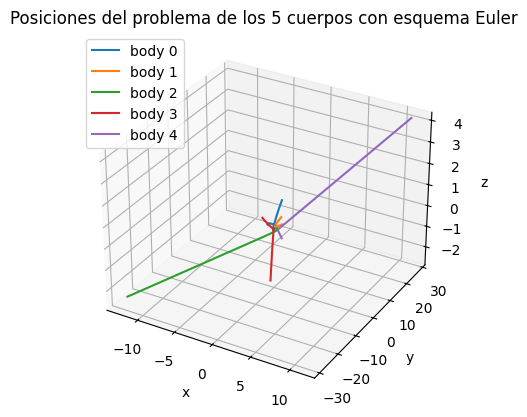

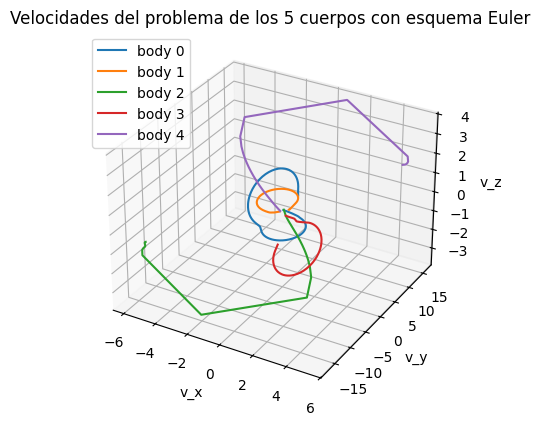

In [13]:
plot_N_body_problem_orbits(N_body_problem, U0_list, t, Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)
plot_N_body_problem_velocities(N_body_problem, U0_list, t, Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

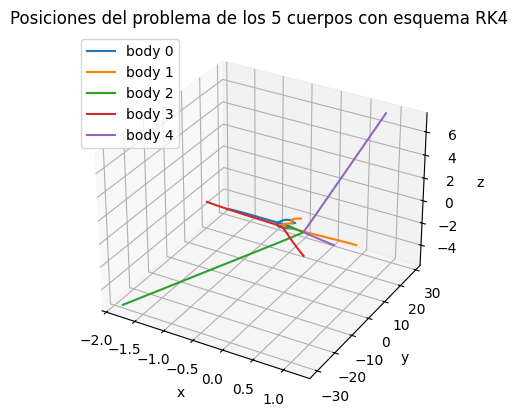

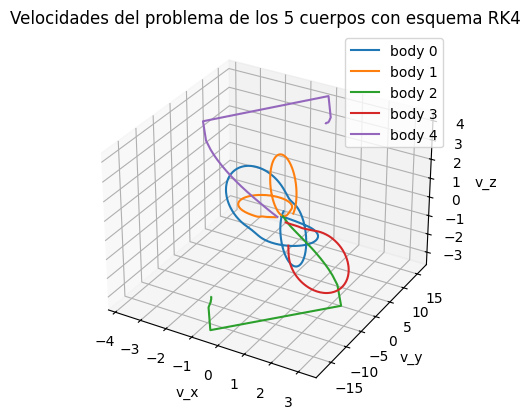

In [14]:
plot_N_body_problem_orbits(N_body_problem, U0_list, t, RK4, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)
plot_N_body_problem_velocities(N_body_problem, U0_list, t, RK4, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

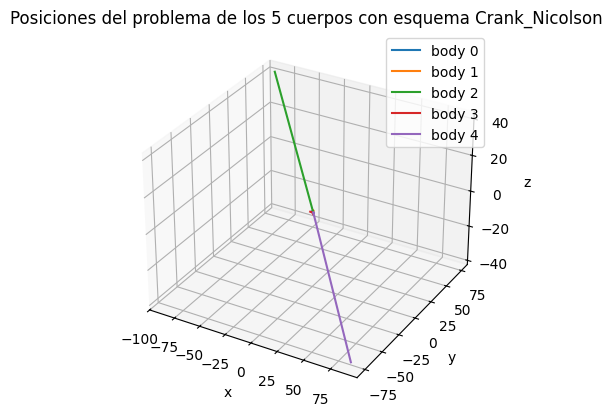

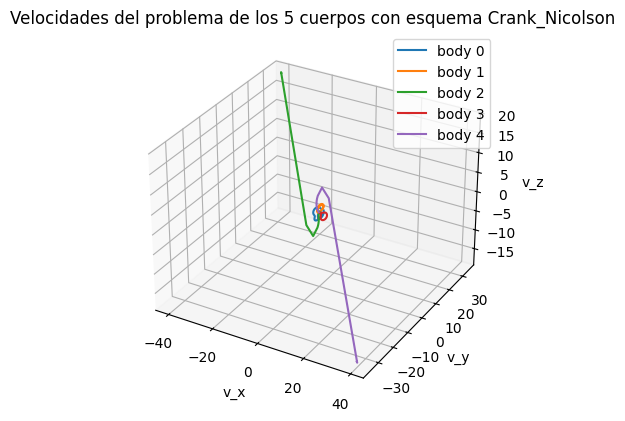

In [15]:
plot_N_body_problem_orbits(N_body_problem, U0_list, t, Crank_Nicolson, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)
plot_N_body_problem_velocities(N_body_problem, U0_list, t, Crank_Nicolson, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: New

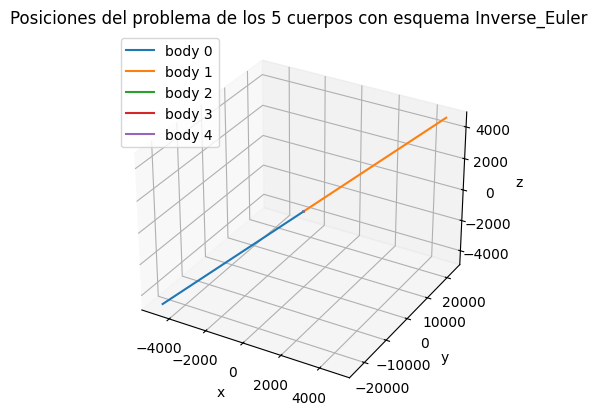

LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: Newton-Raphson ill-defined.
LinAlgError: New

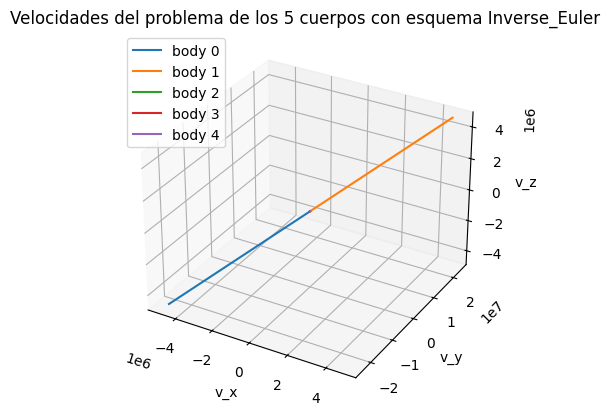

In [21]:
plot_N_body_problem_orbits(N_body_problem, U0_list, t, Inverse_Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)
plot_N_body_problem_velocities(N_body_problem, U0_list, t, Inverse_Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

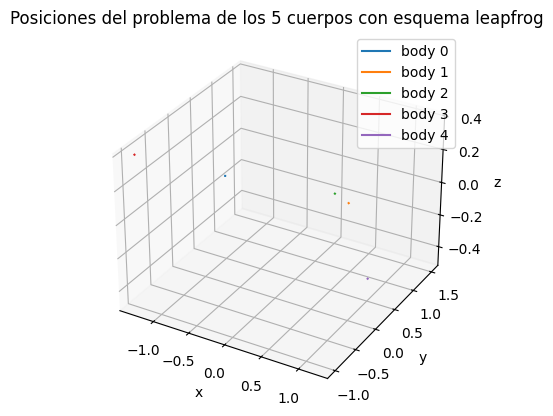

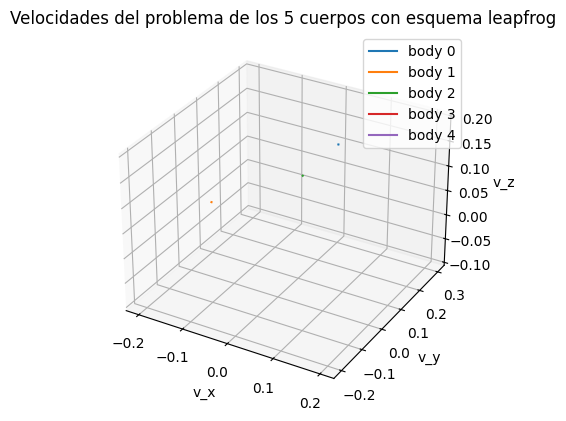

In [23]:
t = linspace(0, T, N_T*100)
plot_N_body_problem_orbits(N_body_problem, U0_list, t, leapfrog)
plot_N_body_problem_velocities(N_body_problem, U0_list, t, leapfrog)